In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys, os
import numpy as np
import pandas as pd
import torch

In [ ]:
root = '/content/drive/MyDrive'
%cd $root

/content/drive/MyDrive


In [ ]:
#prepare data objects
root = '/content/drive/MyDrive'
FOLDERNAME = 'קבצים - מבוא לנוירו חישוביות'
# prepare data variables
data = {
    "train": None,
    "val": None,
    "test": None
}
data_clean = {
    "train": [],
    "val": [],
    "test": []
}
data_rotated = {
    "train": [],
    "val" : [],
    "test": []
}

In [ ]:
badsize = []
badvalue_num = 0
bad_thresh = []
badfile = []
def validateVector(vector, verbose):
  """
  function checks that a vector has valid size, and valid content i.e -1 and 1, and check for any wierd stuff
  if finds an error throws exception
  return false if the vector is not valid
  """
  valid_pixel = [-1,1]
  valid_label = [1,2,3]
  pixel_num_threshold = 5
  isvalid = True
  if(vector.shape[0] != 101):
    if verbose == True:
      print("EXCEPTION - bad size: parsed array in file: ")
    badsize.append(vector.shape[0])
    isvalid = False
  # check that the vector is not all -1 or 1
  if((np.in1d(vector[1:], valid_pixel)).sum() != 0 and not vector[0] in valid_label):
    if verbose == True:
      print("EXCEPTION - not all values are -1 or 1, or the label is not in 1 2 3")
    badvalue_num += 1
    isvalid = False
  # # check if the sum of 1 pixels or -1 pixels is actually less than the threshold
  one_pixels_num = np.sum(vector == 1)
  minus_pixels_num = np.sum(vector == -1);
  if one_pixels_num < pixel_num_threshold or minus_pixels_num < pixel_num_threshold:
    if verbose == True:
      print("Exception - Array 1, -1 values threshold was " + str(one_pixels_num) +", " +str(minus_pixels_num) + " which is less than " + str(pixel_num_threshold))
    bad_thresh.append([one_pixels_num,minus_pixels_num])
    isvalid= False

  return isvalid

In [ ]:
# loads a list of file written vectors into an numpy array
def loadVectors(dataFileNames, indices, verbose):
  """
  dataFileNames: Array of strings containing the names of the files
  indices: np array of ints that each is the index that refers to the file at that index in dataFileNames
  """
  lst = []
  for i in indices:
    try:
      with open(dataFileNames[i]) as f:
          # lines = f.readlines()
          contents = f.read()
          contents = contents.replace("\n","")
          lines = contents.split(")")[:-1]
          # print(lines)
      for line in lines:
        if line != '\n':
          try:
            parsed_arr = np.fromstring(line[1:], sep=',')
             # check if the vector is legit, if not then continue to next one
            if(not validateVector(parsed_arr,verbose)):
              if(verbose):
                print("parsed array in file: ", dataFileNames[i]," in folder: ", foldname ," is in len: ", parsed_arr.shape[0])
                print("EXCEPTION - occured trying to parse vector: ", line)
              break
            lst.append(parsed_arr)
          except Exception as e:
            if(verbose):
              print("EXCEPTION - occured trying to parse vector: ", line)
              print(e)
    except:
      if verbose:
        print("READ EXCEPTION occured trying to read lines of :", dataFileNames[i])
      badfile.append(dataFileNames[i])
      continue # skip the problematic file
  return np.asarray(lst)

In [ ]:
# load the vectors into the data objects
train_precentage = 0.7
val_precentage = 0.2
# cd into dataset
%cd $root/$FOLDERNAME
#load dataset onto ram
for foldname in ['קבצים (מ,ב,ל)', 'קבצים בהטייה של 15% לשני הצדדים (מ,ב,ל)']:
  %cd $foldname
  dataFileNames = os.listdir('.')
  # get the indices for the file names
  data_indices = np.arange(len(dataFileNames))
  # shuffle the indices
  np.random.shuffle(data_indices)
  # pick train set
  last_train_ind = int(train_precentage * len(dataFileNames))
  # pick val set
  last_val_ind = int(last_train_ind + val_precentage * len(dataFileNames))
  # pick test set
  train_indices, val_indices, test_indices = data_indices[:last_train_ind], data_indices[last_train_ind: last_val_ind], data_indices[last_val_ind: ]
  # load the vectors of the test and train set
  train_vectors, val_vectors , test_vectors = loadVectors(dataFileNames, train_indices,False), loadVectors(dataFileNames, val_indices,False) , loadVectors(dataFileNames, test_indices, False)
  # insert into clean and rotated data
  if(foldname == 'קבצים (מ,ב,ל)'):
    # add to data variables
    data_clean['train'] = train_vectors
    data_clean['val'] = val_vectors
    data_clean['test'] = test_vectors
  else:
    data_rotated['train'] = train_vectors
    data_rotated['val'] = val_vectors
    data_rotated['test'] = test_vectors
  print("train vectors shape: ", train_vectors.shape)
  # extend the overall data
  data['train'] = train_vectors.reshape(-1,101) if data['train'] is None else np.concatenate((data['train'],np.concatenate(train_vectors,axis=0).reshape(-1,101)))
  data['val'] =  val_vectors.reshape(-1,101) if data['val'] is None else np.concatenate((data['val'],np.concatenate(val_vectors,axis=0).reshape(-1,101)))
  data['test'] = test_vectors.reshape(-1,101) if data['test'] is None else np.concatenate((data['test'],np.concatenate(test_vectors,axis=0).reshape(-1,101)))
  %cd ..
  print("Exceptions:","\n-------------")
  print("Bad Size Exceptions, Sizes: ", badsize)
  print("Bad values Exceptions num: ",badvalue_num )
  print("Bad threshold Exceptions array where first is -1 values and second is 1 values: ", bad_thresh)
  print("Read Exceptions filenames array: ", badfile)


/content/drive/.shortcut-targets-by-id/1GGLBd_2b1yoicwFQVSG-r981qI9fevLY/קבצים - מבוא לנוירו חישוביות
/content/drive/.shortcut-targets-by-id/1GGLBd_2b1yoicwFQVSG-r981qI9fevLY/קבצים - מבוא לנוירו חישוביות/קבצים (מ,ב,ל)


<ipython-input-6-82edb09abd0b>:19: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  parsed_arr = np.fromstring(line[1:], sep=',')


train vectors shape:  (580, 101)
/content/drive/.shortcut-targets-by-id/1GGLBd_2b1yoicwFQVSG-r981qI9fevLY/קבצים - מבוא לנוירו חישוביות
Exceptions: 
-------------
Bad Size Exceptions, Sizes:  [102, 31, 106, 99]
Bad values Exceptions num:  0
Bad threshold Exceptions array where first is -1 values and second is 1 values:  [[4, 96], [3, 97], [100, 0], [4, 96], [4, 26], [100, 0], [3, 97], [4, 96], [4, 97], [101, 0]]
Read Exceptions filenames array:  []
/content/drive/.shortcut-targets-by-id/1GGLBd_2b1yoicwFQVSG-r981qI9fevLY/קבצים - מבוא לנוירו חישוביות/קבצים בהטייה של 15% לשני הצדדים (מ,ב,ל)
train vectors shape:  (1124, 101)
/content/drive/.shortcut-targets-by-id/1GGLBd_2b1yoicwFQVSG-r981qI9fevLY/קבצים - מבוא לנוירו חישוביות
Exceptions: 
-------------
Bad Size Exceptions, Sizes:  [102, 31, 106, 99, 1, 102, 71]
Bad values Exceptions num:  0
Bad threshold Exceptions array where first is -1 values and second is 1 values:  [[4, 96], [3, 97], [100, 0], [4, 96], [4, 26], [100, 0], [3, 97], [4, 96

In [ ]:
#print sizes of data
len_data = data['train'].shape[0] + data['test'].shape[0] + data['val'].shape[0]
print(len_data)
len_data_train = data['train'].shape[0]
len_data_test = data['test'].shape[0]
len_data_val = data['val'].shape[0]
print("Train data shape: ", data['train'].shape, "Train Precentage: %.3f" % float(len_data_train* 100 / len_data),"%" )
print("Test data shape: ", data['test'].shape, "Test Precentage: %.3f" % float(len_data_test* 100 / len_data),"%" )
print("Val data shape: ", data['val'].shape, "Val Precentage: %.3f" % float(len_data_val* 100 / len_data),"%" )

2415
Train data shape:  (1704, 101) Train Precentage: 70.559 %
Test data shape:  (238, 101) Test Precentage: 9.855 %
Val data shape:  (473, 101) Val Precentage: 19.586 %


In [ ]:
names = ["","Beit","Lamed", "Mem"]
# get data
x_train = data['train']
x_val = data['val']
x_test = data['test']
assert type(x_train) is np.ndarray
assert type(x_train) is np.ndarray
x_train, y_train = x_train[:,1:], x_train[:,0]
x_val, y_val =x_val[:,1:], x_val[:,0]
x_test, y_test = x_test[:,1:], x_test[:,0]

In [ ]:
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
class NeuroDataset(Dataset):
  def __init__(self,X,y):
    assert X.shape[1] == 100
    assert y.shape[0] == X.shape[0]
    self.x = torch.from_numpy(X).to(torch.float32)
    self.y = torch.from_numpy(y).to(torch.long) - 1

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx,:], self.y[idx]
clasify_num = 1
train_dataset = NeuroDataset(x_train,y_train)
test_dataset = NeuroDataset(x_test, y_test)
val_dataset = NeuroDataset(x_val,y_val)
train_dataloader = DataLoader(train_dataset,batch_size=50,shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=50,shuffle=True)

In [ ]:
# showing data with labels
import matplotlib.pyplot as plt

def showdata(images,labels, title=None):
  if title != None:
    plt.suptitle(title, size=16, y=1);
  imgs = torch.reshape(images == 1, (-1,10,10)).squeeze()
  rows,cols = 10, 5
  fig = plt.figure(1,figsize=(10,5))
  for i in range(1, cols*rows +1):
      img = imgs[i-1,:,:]
      plt.axis('off')
      plt.subplots_adjust(hspace=1)
      fig.add_subplot(rows, cols, i)
      plt.title(f"{str(labels[i-1])}", fontsize=10)
      plt.imshow(img,cmap="gray")
  # plt.imshow(img, cmap="gray")
  plt.axis('off')
  plt.show()

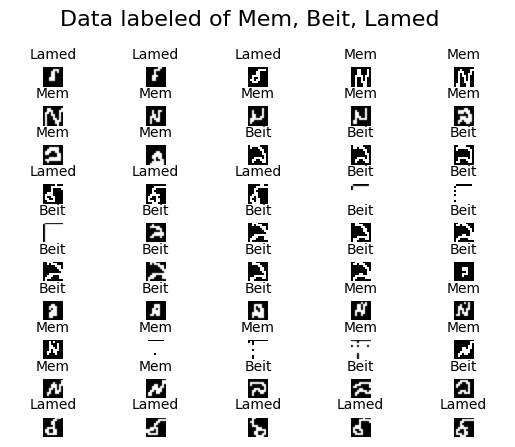

In [ ]:
showdata(train_dataset.x, [names[num + 1] for num in train_dataset.y], "Data labeled of Mem, Beit, Lamed")

In [ ]:
def adaline_forward(X,w,b):
  """
  X: input of shape (N,100)
  w: weights of the model of shape (100,1)
  b: biases of the model of shape (1,1)
  Performs and returns the adaline forward on X on w, with w as weights and with b as biases
  """
  return X.dot(w) + b


In [ ]:
def adaline_backward(dout,x,w,b):
  """
  dout: upstream derivative of shape (N,1)
  x: input the same as the forward input, of shape (N, 100)
  w: weights of the model of shape (100,1)
  b: biases of the model of shape (1,1)
  returns d(adaline) / dw of shape (100,1), db
  """
  dw = dout.transpose().dot(x).reshape(100,)
  db = np.sum(dout)
  return dw,db

In [ ]:
def l2Loss(predictions,y):
  """
  predictions: array of shape (N,1) of predicted values
  y: array of shape (N,1) of expected values
  returns tuple of:
  loss: scalar representing how far predictions are from y
  dout: derivative of l2 with respect to predictions of shape (N,1)
  """
  n = y.shape[0]
  loss = (1/n) * np.sum(np.power(predictions - y,2))
  dout = (-1 * y + 2 * predictions) * (1 / n)
  return loss, dout

In [ ]:
def calcLoss(X,w,b,y):
  """
  X: input of shape (N,100)
  y: targets of shape (N,1)
  returns a tuple of:
  loss: scalar measuring how far the outputs of the model are from y,
  grads: dict where grads[w] is array of shape (100,1), and grads[b] is scalar
  """
  predictions = adaline_forward(X,w,b)
  l2_loss, dout = l2Loss(predictions,y)
  dw, db = adaline_backward(dout,X,w,b)
  grads = {"w": dw, "b":db}
  return l2_loss, grads


In [ ]:
def train(X,w,b,y, lr):
  """
  X: input of shape (N,100)
  w: weights of the model of shape (100,)
  b: biases of the model of shape (1,)
  y: targets of shape (N,)
  updates the weights of the model based on the loss the model in input X with targets y
  """

  loss, grads = calcLoss(X,w,b,y)
  w -= grads['w'] * lr
  b -= grads['b'] * lr
  return loss

In [ ]:
def predict(val):
  """
  val: array of shape (N,1)
  """
  return np.where(val < 0, -1, 1)

In [ ]:
def check_accuracy(x,w,b,y):
  """
  checks the accuracy of adeline model given
  x - input np array of shape (N,100),
  w - weights np array of shape (100,1),
  b - bias number,
  y - labels of shape (N,1)
  """
  assert x.shape[0] == y.shape[0]
  predictions = predict(adaline_forward(x,w,b))
  hits = np.sum(np.where(predictions == y, 1, 0))
  return hits / x.shape[0]


In [ ]:
class AdalineClassifier:

  def __init__(self,c1,c2,lr=6e-3,weight_scale=6e-3):
    """
    self.valid = ['Beit','Lamed','Mem'] where the arary start at 1
    c1 = the first letter in self.valid
    c2 = the second letter in self.valid
    the model will classify between c1 to c2.
    """
    self.valid = [1,2,3]
    assert c1 != c2
    assert c1 in self.valid and c2 in self.valid
    self.c1 = c1
    self.c2 = c2
    self.w = np.random.normal(0, weight_scale, (100,))
    self.b = 0
    self.lr = lr

  def get_y(self,y):
    """
    gets a vector y' of shape (N,)
    returns ones where y equals self.c1 and -1 elsewhere
    """
    return np.where(y == self.c1, 1, -1)

  def train_(self,X,y):
    """
    gets a vector y of shape (N,) where each value is in valid range
    X is a matrix of shape (N,100)
    """

    return train(X,self.w,self.b,self.get_y(y),self.lr)

  def predict_(self,X):
    """
    applies the threshold for the adaline forward scores,
    gives 1 where score >= 0 and -1 where score < 0
    """
    return predict(adaline_forward(X,self.w,self.b))

  def check_accuracy_(self, x_test,y_test):
    return check_accuracy(x_test,self.w,self.b,self.get_y(y_test))

In [ ]:
next_graph = 111
def plotLossHistory(lossHistory, name,i,xaxisTitle="Iteration Num",yaxisTitle="MSE Loss",new_one=False):
  global next_graph
  if(new_one):
    fig = plt.figure()
  colors = ["red","blue","yellow"]
  plt.plot(range(len(lossHistory)), lossHistory, label=name ,color=colors[i])
  plt.legend()
  plt.ylabel(yaxisTitle)
  plt.xlabel(xaxisTitle)
  plt.show

In [ ]:
# split array into folds
arr = data['train']
np.random.shuffle(arr)
folds = np.array_split(arr,5,axis=0)

In [ ]:
def normalize(x):
  mu = np.mean(x,axis=0)
  sigma = np.std(x, axis=0)
  sigma = np.where(sigma==0, np.random.rand(sigma.shape[0]),sigma)
  x = (x - mu) / sigma
  return x

In [ ]:
import copy
def CrossValidation(model: AdalineClassifier, bs):
  accuracies = []
  loss = []
  for i in range(len(folds)):
    folds_copy = copy.deepcopy(folds)
    val = folds[i]
    del folds_copy[i]
    train = np.concatenate(folds_copy)
    train_x,train_y = train[:,1:], train[:,0]
    v_x,v_y = val[:,1:], val[:,0]
    train_x = normalize(train_x)
    v_x = normalize(v_x)
    batches_x = np.array_split(train_x, bs)
    batches_y = np.array_split(train_y,bs)
    for batch_x, batch_y in zip(batches_x,batches_y):
      loss.append(model.train_(batch_x,batch_y))
    acc = model.check_accuracy_(v_x,v_y)
    accuracies.append(acc)

  return accuracies, loss

In [ ]:
#classify beit vs lamed
def findParameters(lr,weight_scale, num_iterations=5, verbose=False):
  classifiers = []
  accuracies = []
  cross_accuracies = []
  lossHistories = []
  for i in range(1,len(names)):
    best_accuracy = 0
    best_model = None
    curLossHistory = []
    next = names[(i % 3) + 1]
    if verbose:
      print(f"\nTraining Classifier for {names[i]} Versus {next}\n","-----------------------")
    classifier = AdalineClassifier(i, ((i+1) % 3) + 1, lr=lr, weight_scale=weight_scale) # init classifier
    # Accuracy before training:
    if(verbose):
      print("Model's Accuracy Before:  %.5f" % classifier.check_accuracy_(x_test,y_test))
    # training the model:
    for k in range(num_iterations):
      # l = classifier.train_(batches_train[j], batches_test[j]) # problem with training the model
      model_accuracies, loss = CrossValidation(classifier,1)
      curLossHistory.extend(loss)
      # print("Loss: ", l)
      # accuracy = classifier.check_accuracy_(x_test,y_test)
      accuracy = np.average(model_accuracies)
      if verbose:
        print(f"Model's Accuracy After {k + 1} epochs:  %.5f" % accuracy)
      if accuracy >= best_accuracy:
        best_model = classifier
        best_accuracy = accuracy
    classifiers.append(best_model)
    accuracies.append(best_accuracy)
    cross_accuracies.append(model_accuracies)
    lossHistories.append(curLossHistory)
    if(verbose):
      plotLossHistory(curLossHistory,names[i]+" - Versus - " +next, i-1)
  return  accuracies, classifiers, lossHistories, cross_accuracies

In [ ]:
# random search for hyper parameters
lower_lr , upper_lr = 6e-4, 2e-3
lower_weightscale , upper_weightscale = 6e-4, 2e-3
lrs = []
weight_scales =[]
num_iterations = 5
best_models = [None,None,None]
best_accuracies = [0,0,0]
best_parameters = [None,None,None] # (lr, ws, bs)
# init parameters to search
limit = 2
batch_sizes = np.arange(limit) + 10
bestLossHistory = [None,None,None]
for i in range(limit):
  rand_lr = np.random.uniform(0,1) * (upper_lr - lower_lr) + lower_lr
  rand_ws = np.random.uniform(0,1) * (upper_weightscale - lower_weightscale) + lower_weightscale
  lrs.append(rand_lr)
  weight_scales.append(rand_ws)
# find best model
for lr in lrs:
  for ws in weight_scales:
    for bs in batch_sizes:
      accuracies, models, lossHistory, cross_accuracies = findParameters(lr,ws,num_iterations)
      # check model is
      assert len(models) == 3
      assert len(accuracies) == len(models)
      for i in range(len(models)):
        if accuracies[i] >= best_accuracies[i]:
          best_models[i] = models[i]
          best_accuracies[i] = accuracies[i]
          bestLossHistory[i] = lossHistory[i]
          best_parameters[i] = (lr,ws,bs)

Model's Accuracy on Beit Vesus Lamed After Random Search:  0.79696
Model's Accuracy on Lamed Vesus Mem After Random Search:  0.81398
Model's Accuracy on Mem Vesus Beit After Random Search:  0.77699


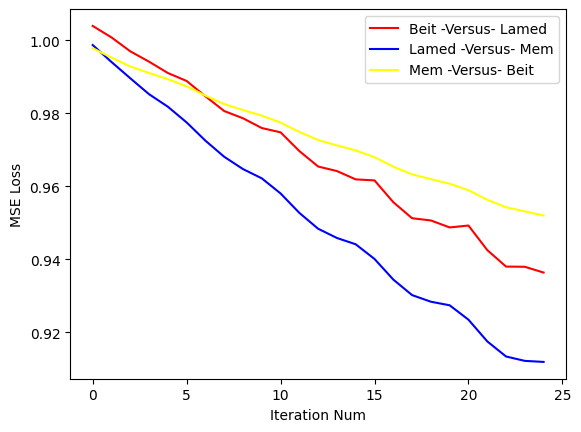

In [ ]:
for i in range(1,len(names)):
  first = names[i]
  second = names[(i% 3) + 1]
  plotLossHistory(bestLossHistory[i-1], f"{first} -Versus- {second}", i-1)
  print(f"Model's Accuracy on {first} Vesus {second} After Random Search:  %.5f" %best_accuracies[i-1])

In [ ]:
# train 3 models with cross validations with the best parameters
for arr in cross_accuracies:
  for num in arr:
    print("{:.4f}".format(num))
  print("-")
# standard deviation
print("STD ")
for arr in cross_accuracies:
  sigma = np.std(arr, axis=0)
  print("{:.4f}".format(sigma))

0.8270
0.7683
0.7243
0.7801
0.7824
-
0.7977
0.7859
0.7595
0.8152
0.8294
-
0.7977
0.7683
0.7595
0.7830
0.7676
-
STD 
0.0328
0.0241
0.0135


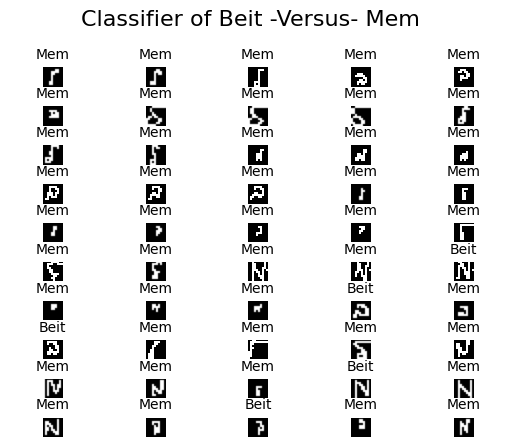

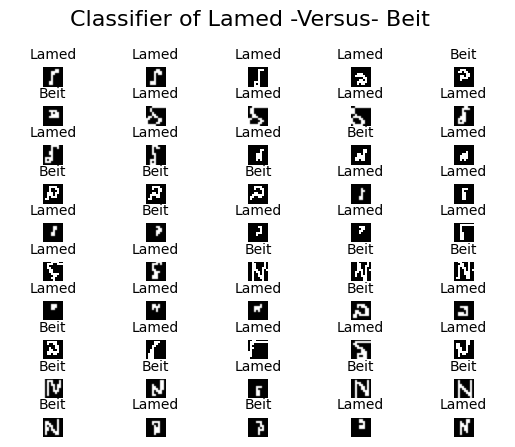

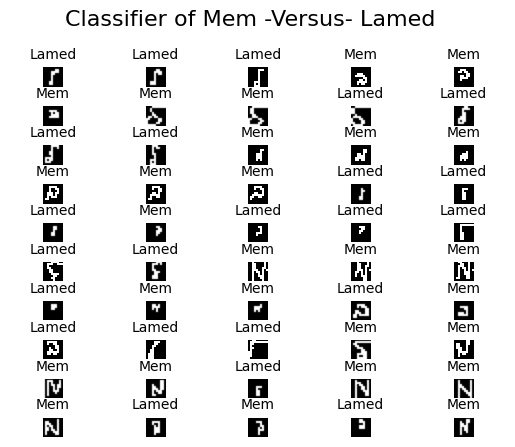

In [ ]:
x,y = x_test[:50,:], y_test[:50]
# show the models's predictions
for i in range(len(best_models)):
  classifier = best_models[i]
  predictions = classifier.predict_(x)
  showdata(torch.from_numpy(x),np.where(predictions == 1, names[classifier.c1], names[classifier.c2]),
           "Classifier of " + names[classifier.c1] + " -Versus- " + names[classifier.c2])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import Normalize
import copy

# Normalize the input data
transform = Normalize(mean=[0.5], std=[0.5])

class Net(nn.Module):
    def __init__(self, weight_scale=6e-3):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(100, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)
        torch.nn.init.normal_(self.fc1.weight, 0, weight_scale)
        torch.nn.init.normal_(self.fc2.weight, 0, weight_scale)
        torch.nn.init.normal_(self.fc3.weight, 0, weight_scale)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def fc_model_predict(x_test, model):
    scores = model(x_test)
    predictions = torch.argmax(scores, dim=1)
    return predictions

def fc_accuracy(x_test, y_test, model):
    predictions = fc_model_predict(x_test, model)
    accuracy = torch.sum(predictions == y_test.long()) / x_test.shape[0]
    return accuracy.item()

def fc_train(dataloader, model, optimizer, criterion, device, with_update=True):
  global best_accuracy
  global best_model
  global lossHistory
  global accuracyHistory
  model.train()
  # best_train_accu
  for i, data in enumerate(dataloader):
      x, y = data
      x = x.to(device)
      y = y.to(device)

      optimizer.zero_grad()
      scores = model(x)
      loss = criterion(scores, y)
      loss.backward()
      optimizer.step()

      train_accuracy = fc_accuracy(x, y, model) * 100
      x,y = val_dataset.x, val_dataset.y
      x = x.to(device)
      y = y.to(device)
      accuracy = fc_accuracy(x,y,model)*100
      if with_update:
        accuracyHistory.append(accuracy)
        lossHistory.append(loss.item())

        # if (i + 1) % 5 == 0:  # Print loss and accuracy every 5 iterations
        #     print(f"Iteration num {i + 1} Loss: {loss:.5f}")
        #     print("Train accuracy: {:.3f} %".format(train_accuracy))

        #     print(f"Test Accuracy: %.4f" % (accuracy), "%")
        #     print("-------------")

      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = copy.deepcopy(model)

In [ ]:
print(Net())

Net(
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)


In [ ]:
# set parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_dataloader.transform = transform
best_model = None
best_accuracy = 0
lossHistory = []
accuracyHistory = []

In [ ]:
x = train_dataset.x.to(device)
y = train_dataset.y.to(device)
limit = 2 # set limit to 15 if you want better results
lower_lr , upper_lr = 6e-3, 1e-2
lower_weightscale , upper_weightscale = 6e-3, 2e-2
lrs = []
weight_scales =[]
num_iterations = 5

for i in range(limit):
  rand_lr = np.random.rand() * (upper_lr - lower_lr) + lower_lr
  rand_ws = np.random.rand() * (upper_weightscale - lower_weightscale) + lower_weightscale
  lrs.append(rand_lr)
  weight_scales.append(rand_ws)

best_accuracy_history = []
bestlossHistory = []
b = 0
best_accuracy = 0
for ws in weight_scales:
  for lr in lrs:
    accuracyHistory = []
    lossHistory = []
    model = Net(ws).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0)
    criterion = nn.CrossEntropyLoss()
    # print("Showing Iteration Loss And Accuracy On Training Set")
    # print("--------------")
    for epoch in range(20):  # Increase the number of epochs
        fc_train(train_dataloader, model, optimizer, criterion, device,True)
    if best_accuracy > b:
      bestlossHistory = lossHistory
      best_accuracy_history = accuracyHistory
      b = best_accuracy
    print(f"Val Accuracy: {best_accuracy},  ws = {ws} , lr = {lr}")

print(f"Best!! Val Accuracy: %.4f" % (b), "%")



Val Accuracy: 82.24101662635803,  ws = 0.006370634252723995 , lr = 0.009271727929471035
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.006806135887050497
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.008651651322059393
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.008987665604804731
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.009216011694555559
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.00753959752303788
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.0070044671197535
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.007573862861307386
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.008411399771865277
Val Accuracy: 84.98942852020264,  ws = 0.006370634252723995 , lr = 0.0073015494313842175
Val Accuracy: 84.98942852020264,  ws = 0.006811061827379372 , lr = 0.009271727929471035
Val Accuracy: 84.98942852020264,  

In [ ]:
x,y = test_dataset.x, test_dataset.y
x = x.to(device)
y = y.to(device)
test_accuracy = fc_accuracy(x,y,best_model)
print(f"Best!! Test Accuracy: %.4f" % (test_accuracy), "%")

Best!! Test Accuracy: 0.8487 %


Test Accuracy: 84.8740 %


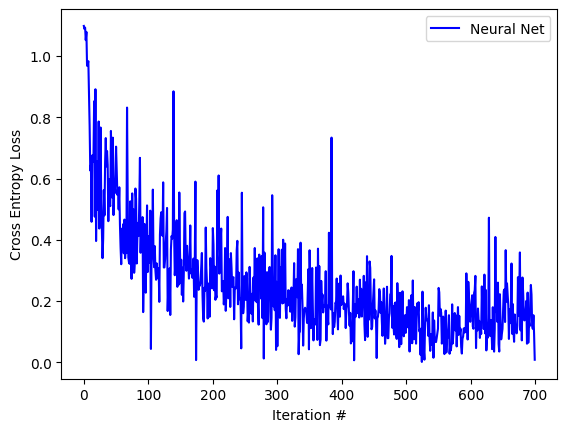

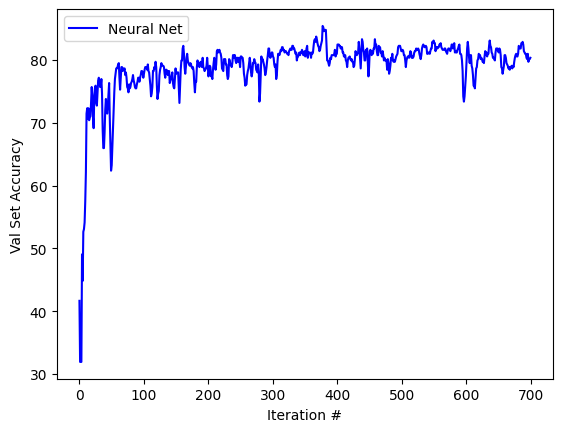

In [ ]:
x,y = test_dataset.x, test_dataset.y
x = x.to(device)
y = y.to(device)
print(f"Test Accuracy: %.4f" % (fc_accuracy(x,y,best_model)*100), "%")
plotLossHistory(bestlossHistory,"Neural Net",1,"Iteration #", "Cross Entropy Loss",True)
plotLossHistory(best_accuracy_history,"Neural Net",1,"Iteration #", "Val Set Accuracy",True)

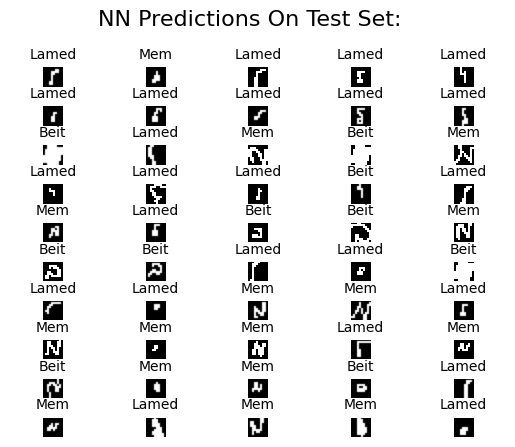

In [ ]:
x,y = next(iter(test_dataloader)) # take out a sample of test images
x = x.to(device)
y = y.to(device)
predictions = fc_model_predict(x,best_model)
# print(f"1 is for {letters[test_dataset.c1]} and 0 for {letters[test_dataset.c2]}")
showdata(x,[names[num+1] for num in predictions], "NN Predictions On Test Set:")

<p>Part 2: Adeline<p>
In Summary, we implemented a Adaline model for which we used Mean Squared Error loss. We implented back propagation the algorithm to update the weights, we created 3 models for which we optimized thier hyperparameters using random search. The hyperparameters we decided to update are: batch size, learning rate, weight scale. We found out that the best {insert batch size} {insert lr} {insert ws}.</n>
<p>Part 3: Neural Network</p>
We implemented a neural network with three layers, where the first layer is of shape (100,128) because the first one is the input vector size, and the second shape is 128 for trial and error reasons. The second layer is of shape (128,64) because the output of the first layer is a vector of shape (n,128) therefore we must have the second layer begin with 128, and the 64 is to achive aggregated features on the 128 features, we selected 64 for trial and error reasons. The third layer is of shape (64,3) the first shape is trivial for which we stated above, and the second is because we want to reduce the aggregated features to classifications.

In [ ]:
#names = ["","Beit","Lamed", "Mem"]

def plotPoints(points, labels, title):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  # fig.title(title)
  stacked = np.hstack((points,labels.reshape(-1,1)))
  colors = ["red","blue","green"]
  for point in stacked:
    ax.scatter(points[0],point[1],point[2], color=colors[int(point[3])])
  ax.set_xlabel("Mem Score")
  ax.set_ylabel("Beit Score")
  ax.set_zlabel("Lamed Score")
  plt.show()

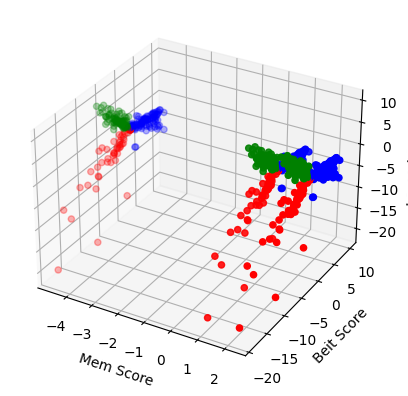

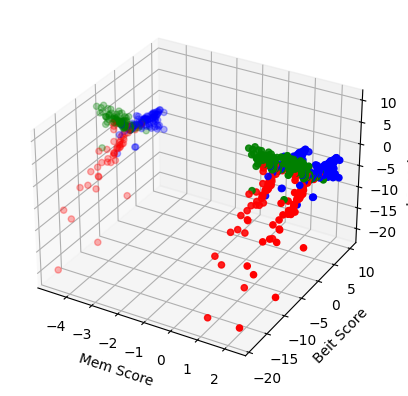

In [ ]:
# show the data in 3 planes
# it = iter(test_dataloader)
all_predictions = None
all_scores = None
all_y = None
for x,y in test_dataloader:
  with torch.no_grad():
    scores = best_model(x)
    scores = scores.numpy()
    predictions = fc_model_predict(x,best_model)
    all_predictions = predictions if all_predictions is None else np.concatenate((all_predictions, predictions),axis=0)
    all_scores = scores if all_scores is None else np.concatenate((all_scores, scores),axis=0)
    all_y = y if all_y is None else np.concatenate((all_y, y),axis=0)

# show models predictions
plotPoints(all_scores,all_predictions,"NN predictions on 3d space")
# show actual labels
plotPoints(all_scores,all_y, "NN actual labels on 3d space")

In [ ]:
all_data = np.concatenate((data['train'],data['test']))
np.random.shuffle(all_data)
print(all_data.shape)
print(type(all_data))

(1942, 101)
<class 'numpy.ndarray'>


In [ ]:
# new_data = []
# normalize = Normalize([0.5],[0.5])
# for i, vector in enumerate(all_data):

#     arr, label = vector[1:].astype(float), vector[0].astype(float)
#     # Generate random numbers with normal distribution
#     mean = 0.5
#     std = 0.5
#     normalized_arr = np.random.normal(loc=mean, scale=std, size=arr.shape)

#     # Subtract the mean from the array
#     normalized_arr = np.subtract(arr, normalized_arr)

#     # Divide the array by the standard deviation
#     normalized_arr = np.divide(normalized_arr, std)

#     print(fc_model_predict(torch.from_numpy(normalized_arr).float(), best_model))
#     # print(best_model())
#     # didnt_hit =  != torch.from_numpy(label).float()
#     print(didnt_hit)
#     if not didnt_hit:
#         new_data.append(vector)

# all_data = np.array(new_data)

In [ ]:
# x_train , y_train = all_data[:int(0.8 * all_data.shape[0]),1:], all_data[:int(0.8 * all_data.shape[0]),0]
# x_test , y_test = all_data[int(0.8 * all_data.shape[0]):,1:], all_data[int(0.8 * all_data.shape[0]):,0]
# print(x_train.shape,y_train.shape)
# print(x_test.shape,y_test.shape)